In [37]:
#Medical Insurance Cost


In [38]:
#from google.colab import files
#uploaded = files.upload()

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
df = pd.read_csv("insurance.csv")

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
df.shape

(1338, 7)

In [46]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
#categorical features - Sex , Smoker , Region

/tmp/ipython-input-4202744285.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


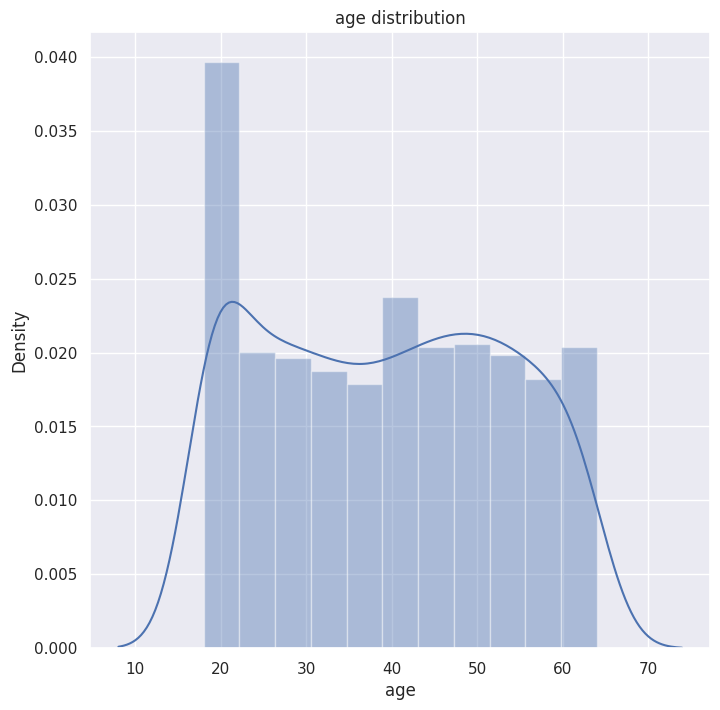

In [48]:
#distribution of age value

sns.set()
plt.figure(figsize= (8,8))
sns.distplot(df['age'])
plt.title("age distribution")
plt.show()

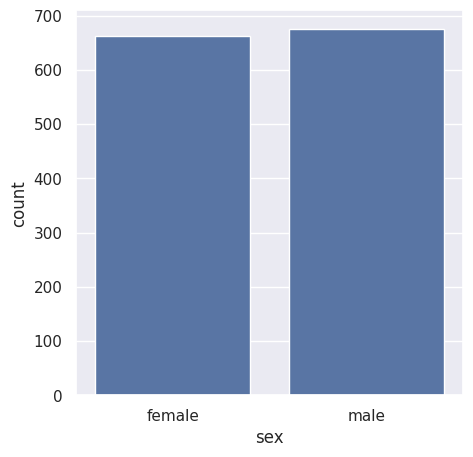

In [49]:
#Gender

plt.figure(figsize= (5,5))
sns.countplot(x='sex',data=df)
plt.show()

In [50]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-3148450817.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


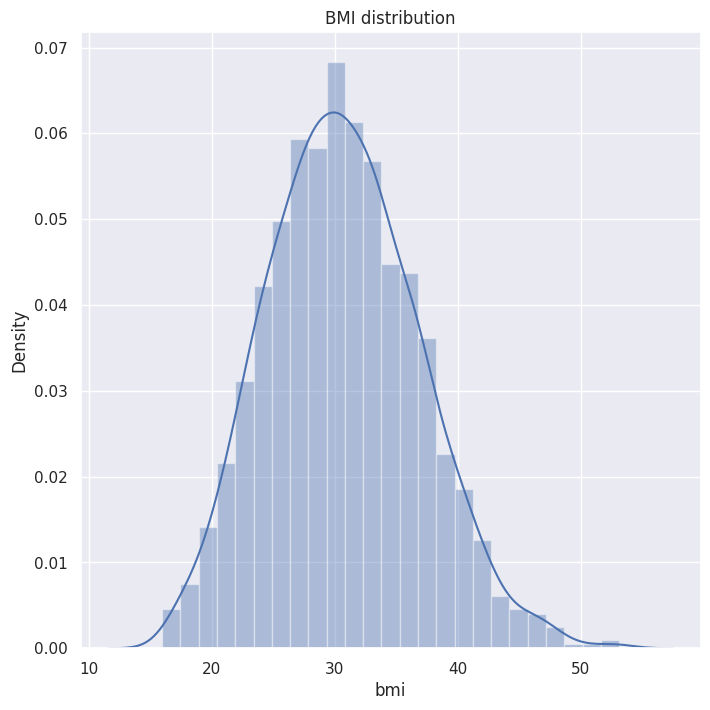

In [51]:
#bmi distribution
plt.figure(figsize= (8,8))
sns.distplot(df['bmi'])
plt.title("BMI distribution")
plt.show()

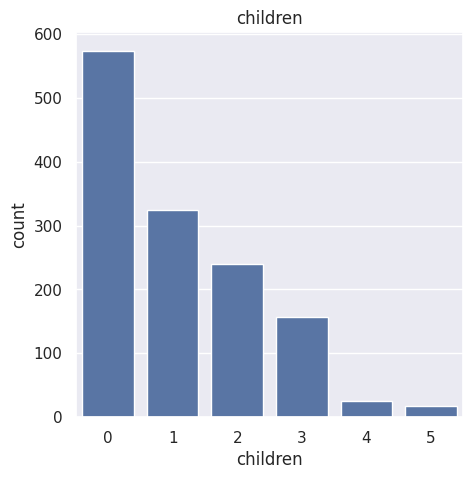

In [52]:
#children

plt.figure(figsize=(5,5))
sns.countplot(x='children',data=df)
plt.title('children')
plt.show()

In [54]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


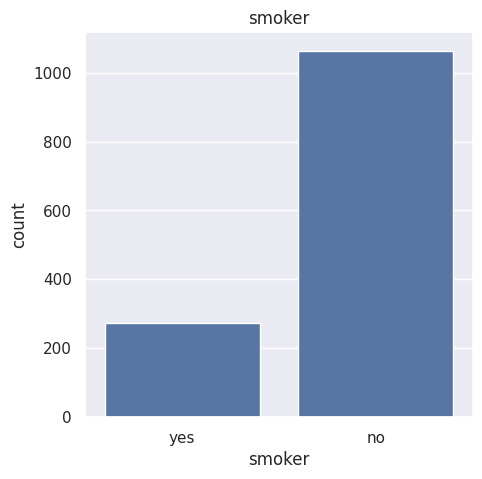

In [55]:

plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('smoker')
plt.show()

In [56]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


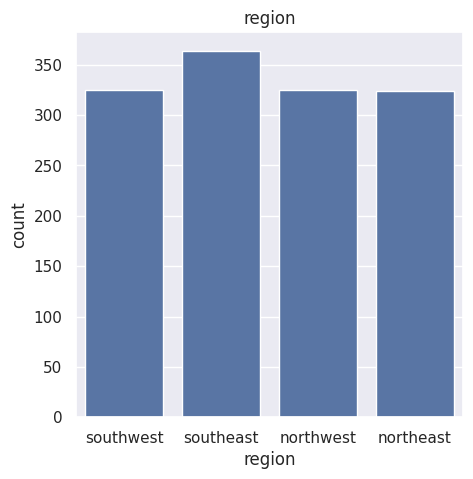

In [57]:

plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('region')
plt.show()

/tmp/ipython-input-1274025378.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


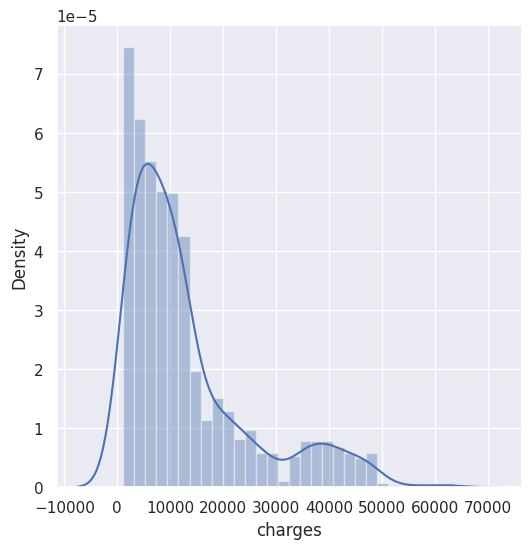

In [58]:
#distribution of charges values
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.show()

In [59]:
#Encoding the categorical feeatures
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

/tmp/ipython-input-4264451109.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True)
/tmp/ipython-input-4264451109.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipython-input-4264451109.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

In [60]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [61]:
X = df.drop(columns='charges')
Y=df['charges']

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state=2)

In [64]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [65]:
train_pred= model.predict(X_train)

In [66]:
test_pred = model.predict(X_test)

In [68]:
#Evaluation R square score
train_score = metrics.r2_score(Y_train,train_pred)
train_score

0.751505643411174

In [69]:
test_score = metrics.r2_score(Y_test,test_pred)

In [70]:
test_score

0.7447273869684076

In [71]:
input=[27,0,42.13,0,0,0]
input = np.asarray(input)
input= input.reshape(1,-1)


In [72]:
price = model.predict(input)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
print(price) #39611.7577

[32075.73866962]


In [75]:
print("The insurance cost is USD",price[0])

The insurance cost is USD 32075.738669618917
